#Traffic Light Detection Using YOLOv8 Model

Using the dataset from roboflow, and using ultralytics to perform training and testing on the yolo model

##Importing and loading Model and Dataset

In [1]:
import os
import glob
from google.colab import files
from IPython.display import Image, display

In [2]:
!git clone https://github.com/MuhammadMoin97/ultralytics.git
HOME = os.getcwd()
%cd {HOME}/ultralytics
!pip install -e '.[dev]'

fatal: destination path 'ultralytics' already exists and is not an empty directory.
/content/ultralytics
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.3
    Uninstalling ultralytics-8.0.3:
      Successfully uninstalled ultralytics-8.0.3
  Running setup.py develop for ultralytics


In [4]:
HOME = '/content/ultralytics/ultralytics/yolo/v8/detect'
%cd {HOME}

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LseoUu3wNCQP6GR4YrCR")
project = rf.workspace("wawan-pradana").project("cinta_v2")
dataset = project.version(1).download("yolov5")

/content/ultralytics/ultralytics/yolo/v8/detect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cinTA_v2-1 in yolov5pytorch:: 100%|██████████| 4806/4806 [00:00<00:00, 8376.72it/s]


##Model Training

In [5]:
'''
dataset = "/content"
HOME = '/content/ultralytics/ultralytics/yolo/v8/detect'
%cd {HOME}
'''

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 83.7M/83.7M [00:00<00:00, 116MB/s]

/content/ultralytics/ultralytics/nn/tasks.py:341: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(attempt_download(w

##Metrics
Confusion Matrix, Losses from training and val

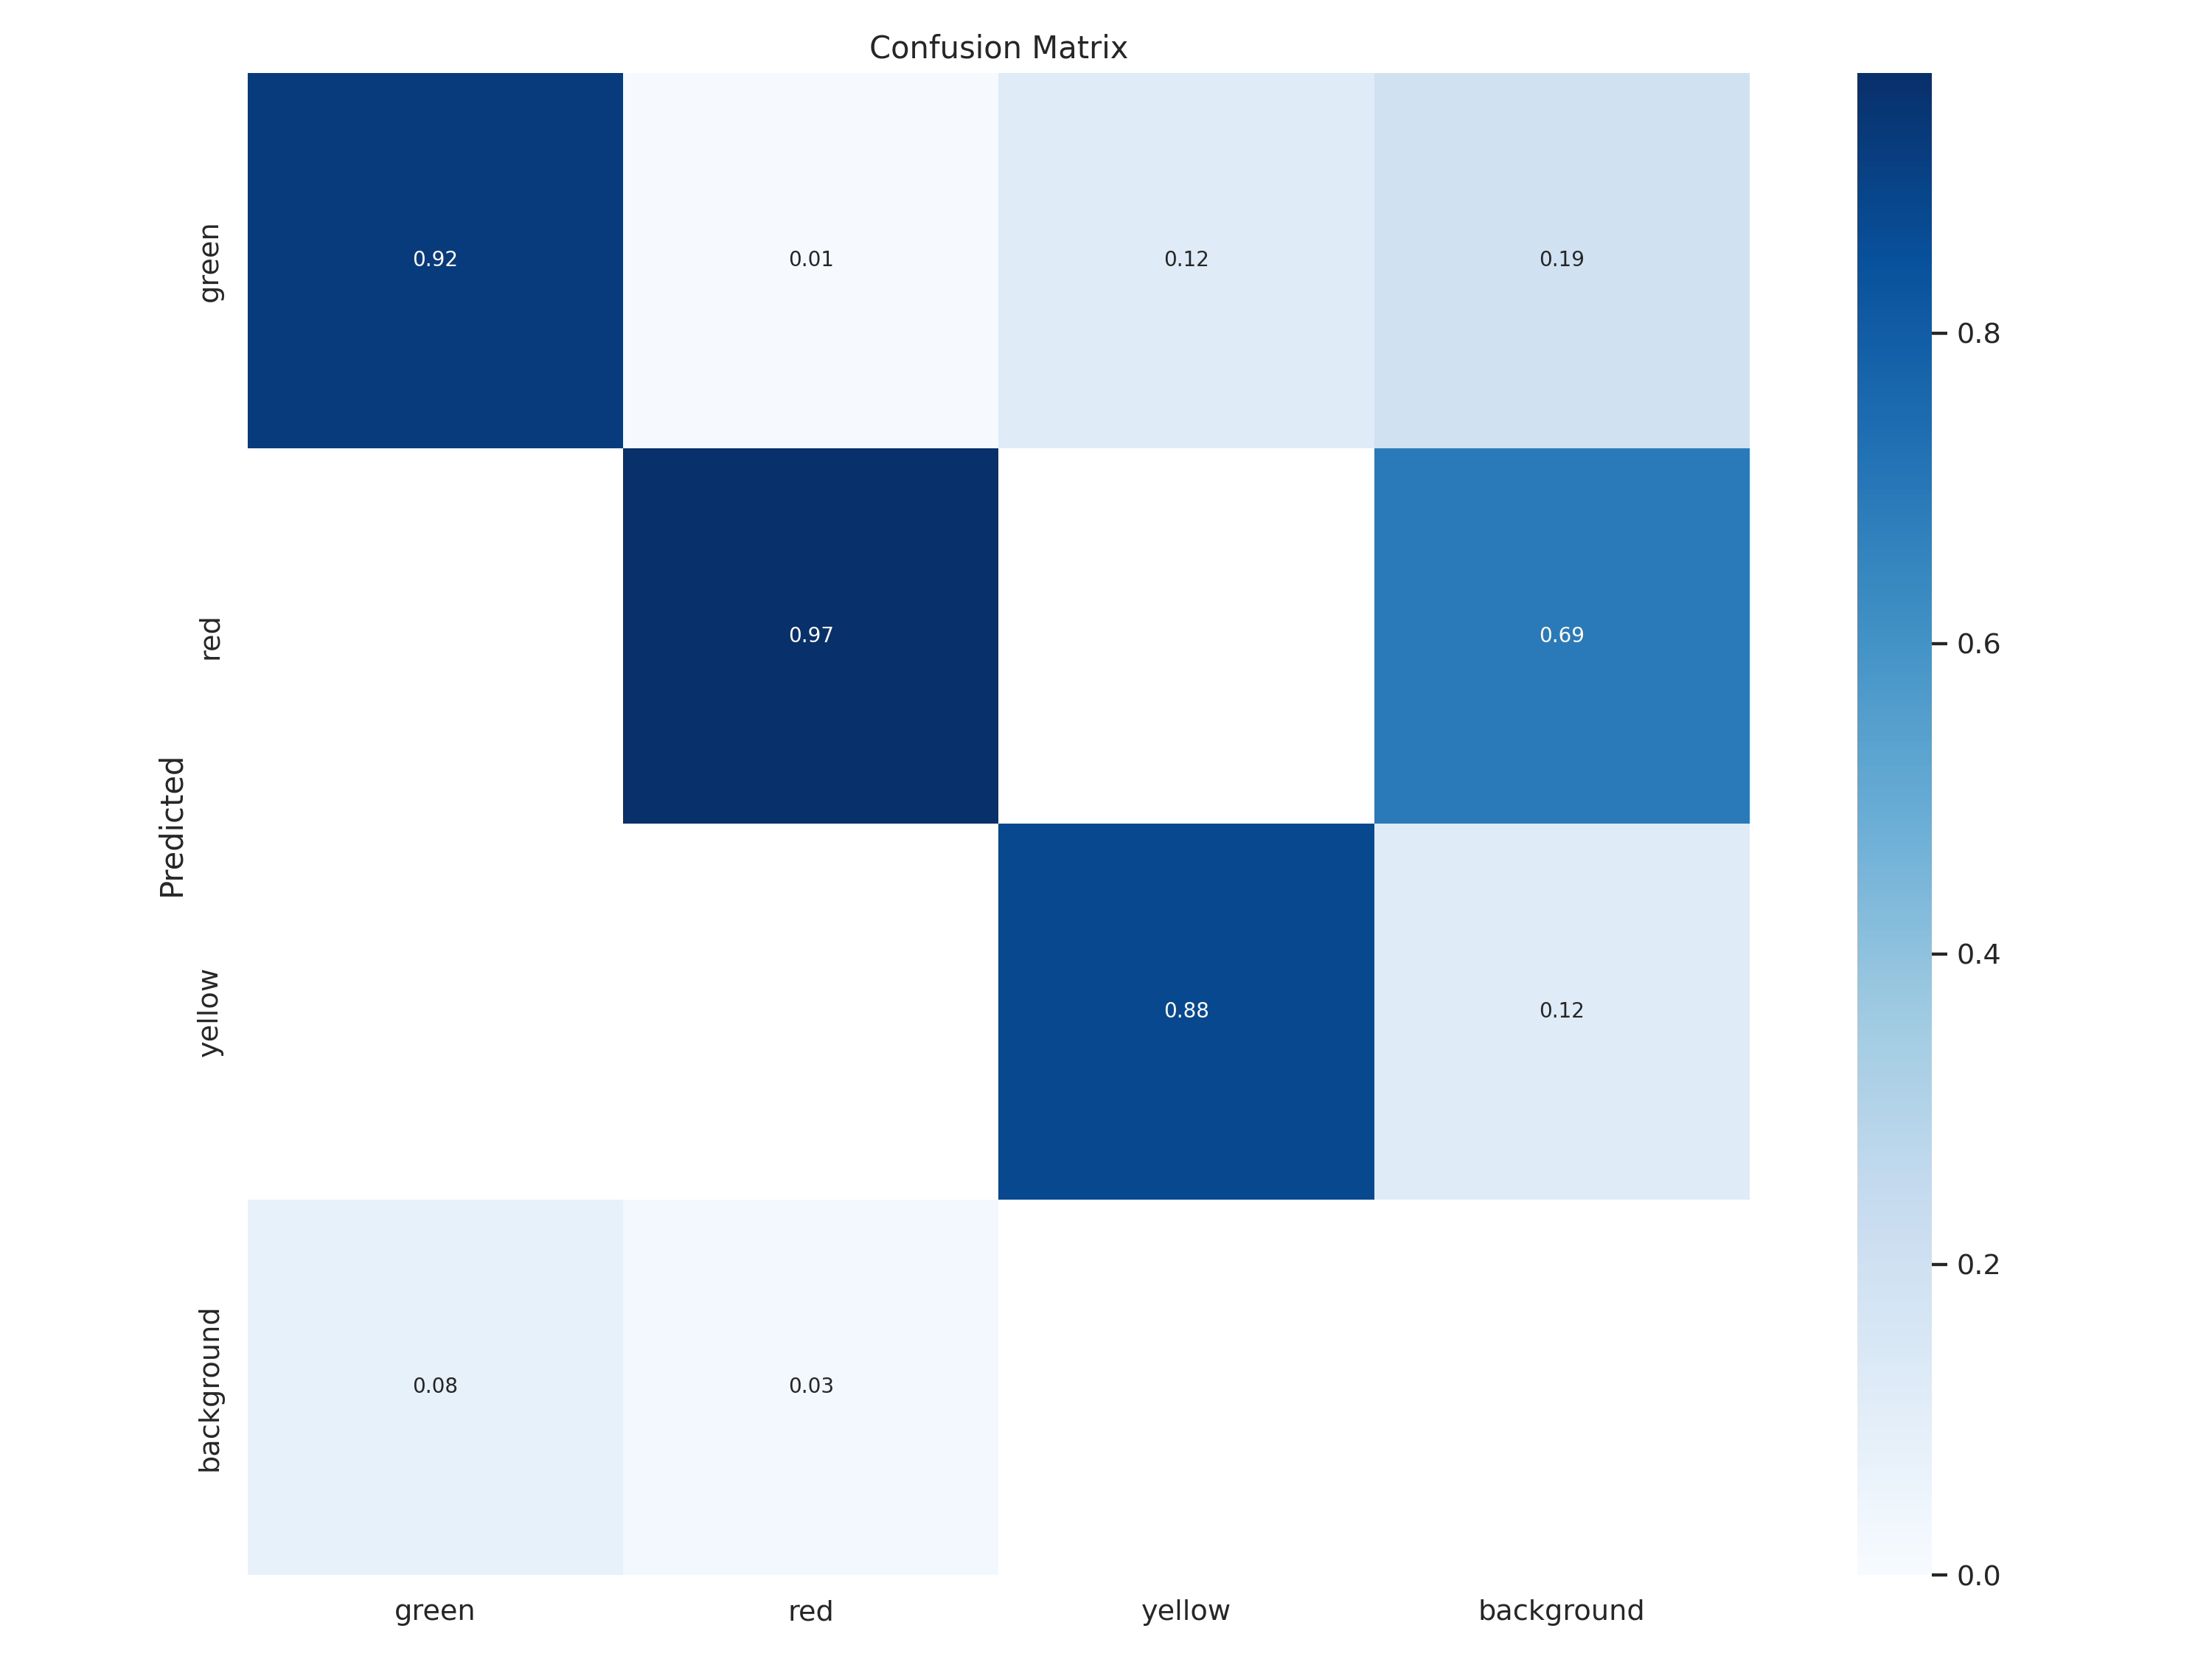

In [5]:
#Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

Image(filename=f'/content/ultralytics/runs/detect/train/confusion_matrix.png', width=900)

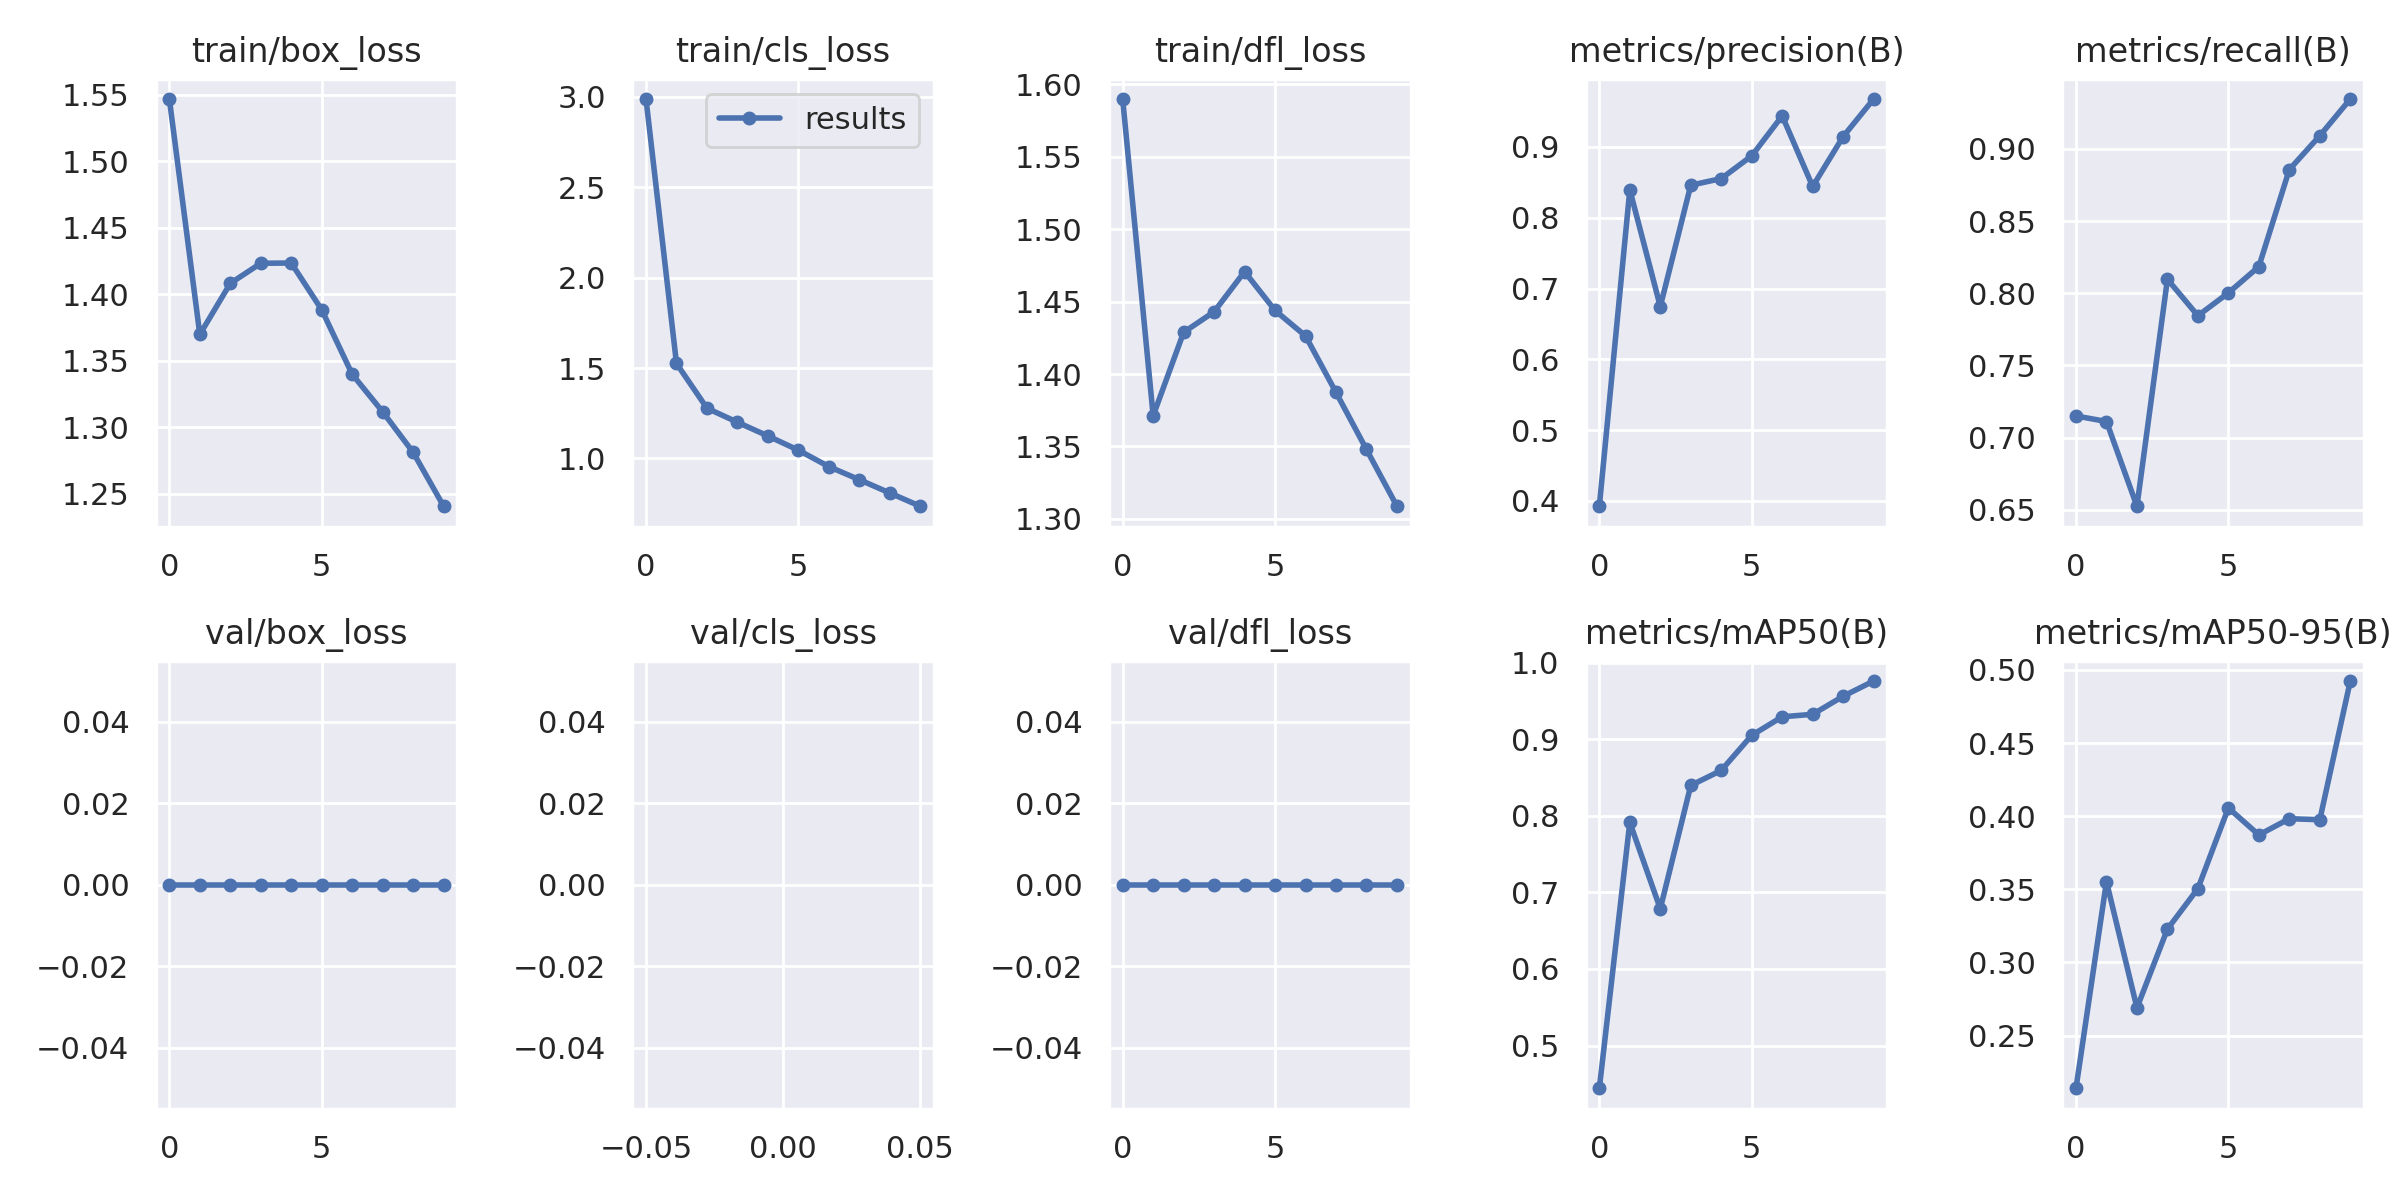

In [6]:
Image(filename=f'/content/ultralytics/runs/detect/train/results.png', width=600)

##Validating the model

In [8]:
!python val.py model='/content/ultralytics/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

2025-03-13 07:54:58.558066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741852498.582029    8765 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741852498.589312    8765 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 07:54:58.614553: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Ultralytics YOLOv8.0.3 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
/content/ultralytics/ultralytic

##Model Testing

In [10]:
!python predict.py model='/content/ultralytics/runs/detect/train/weights/best.pt' source='/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/test/images'

2025-03-13 09:22:19.084608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741857739.119494    8523 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741857739.129818    8523 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 09:22:19.164713: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Ultralytics YOLOv8.0.3 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
/content/ultralytics/ultralytics/nn/tas

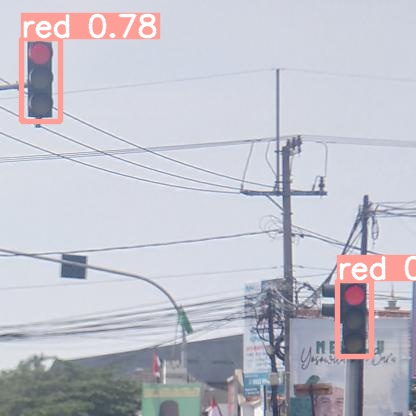

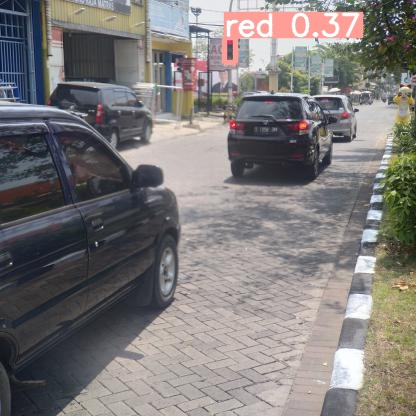

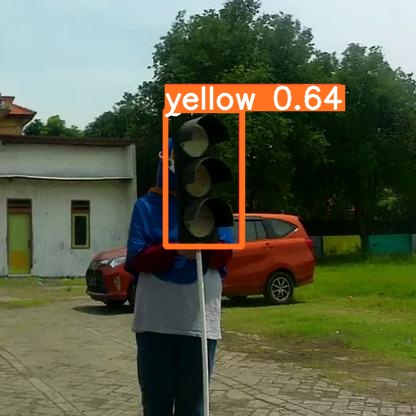

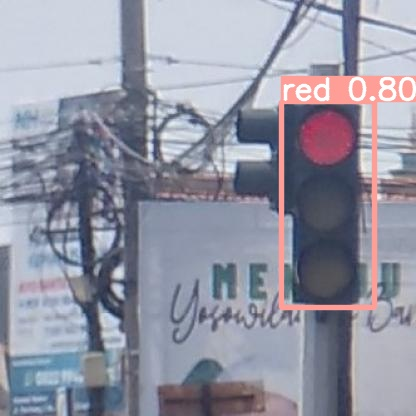

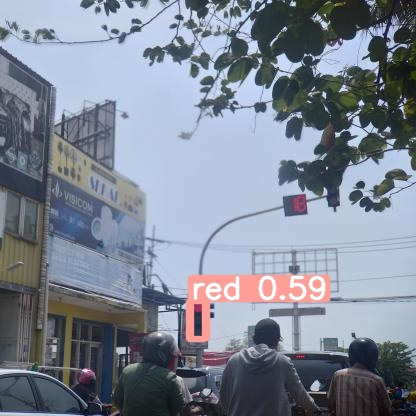

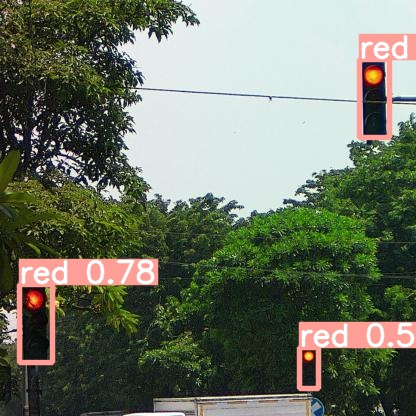

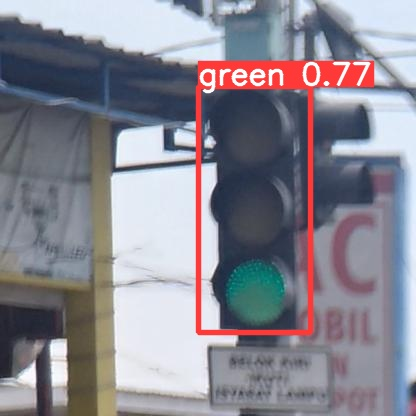

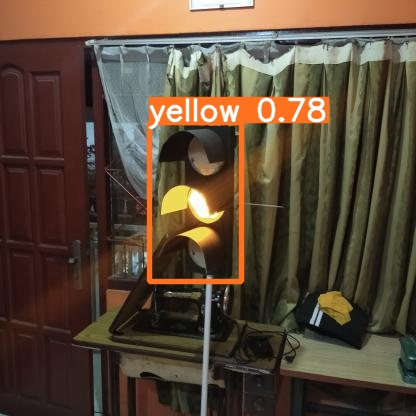

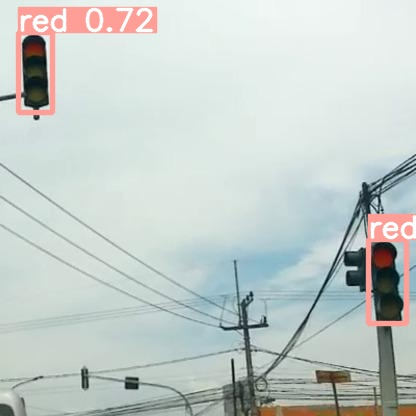

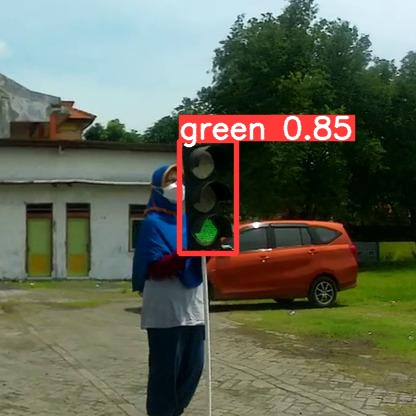

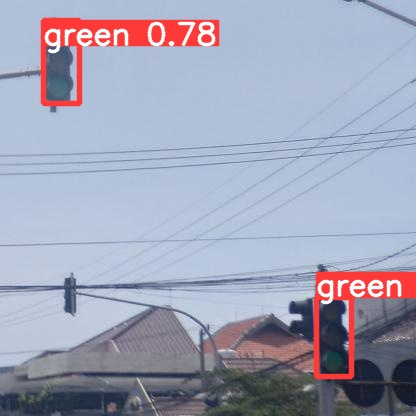

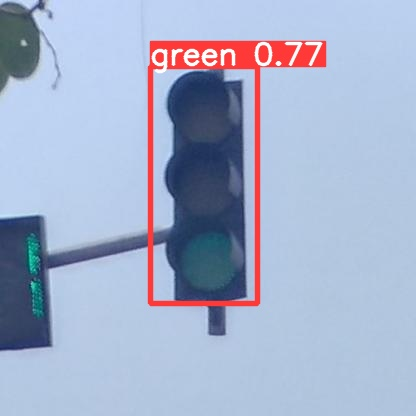

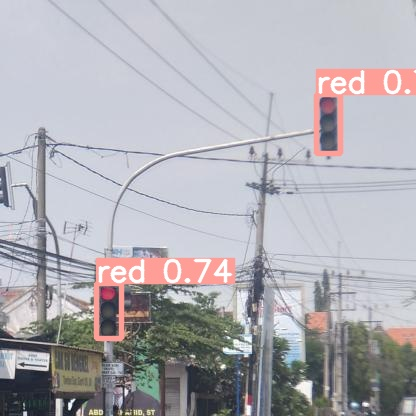

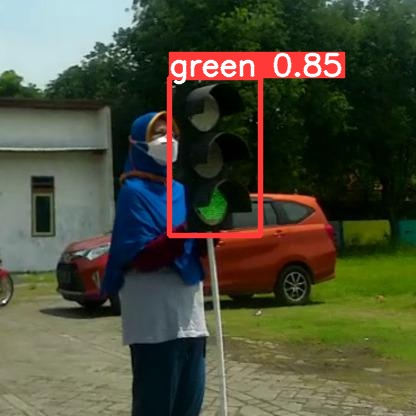

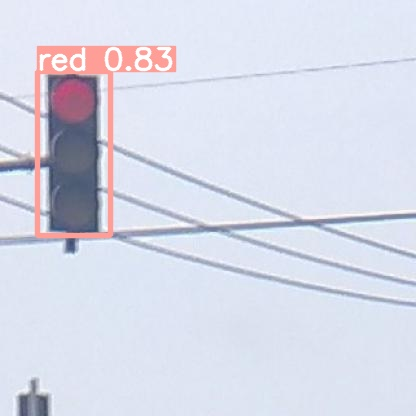

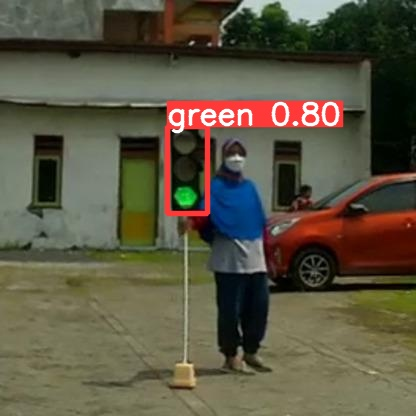

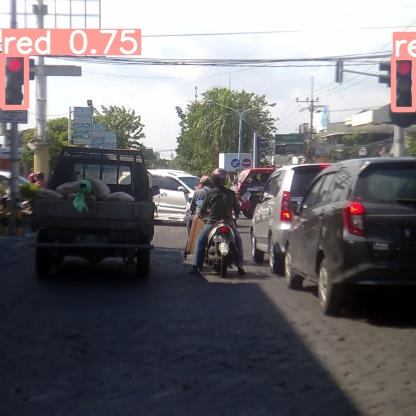

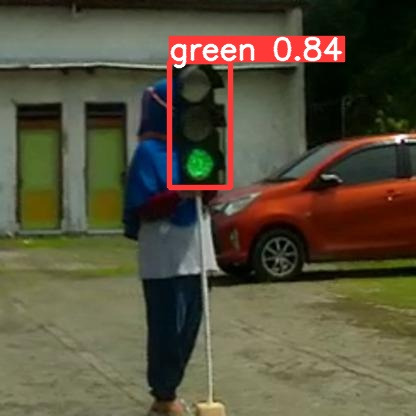

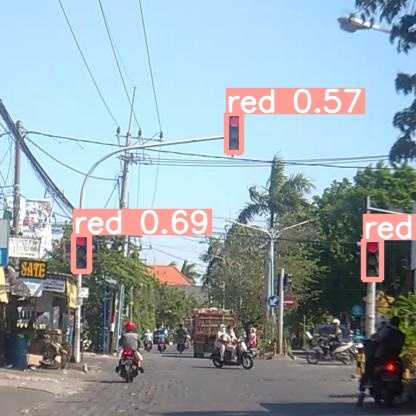

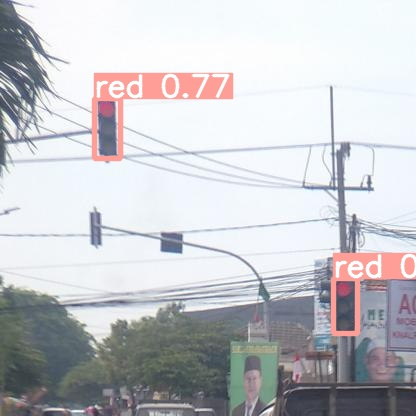

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/runs/detect/train3/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

##Testing on a Non Traffic Light image (no bounding boxes found)

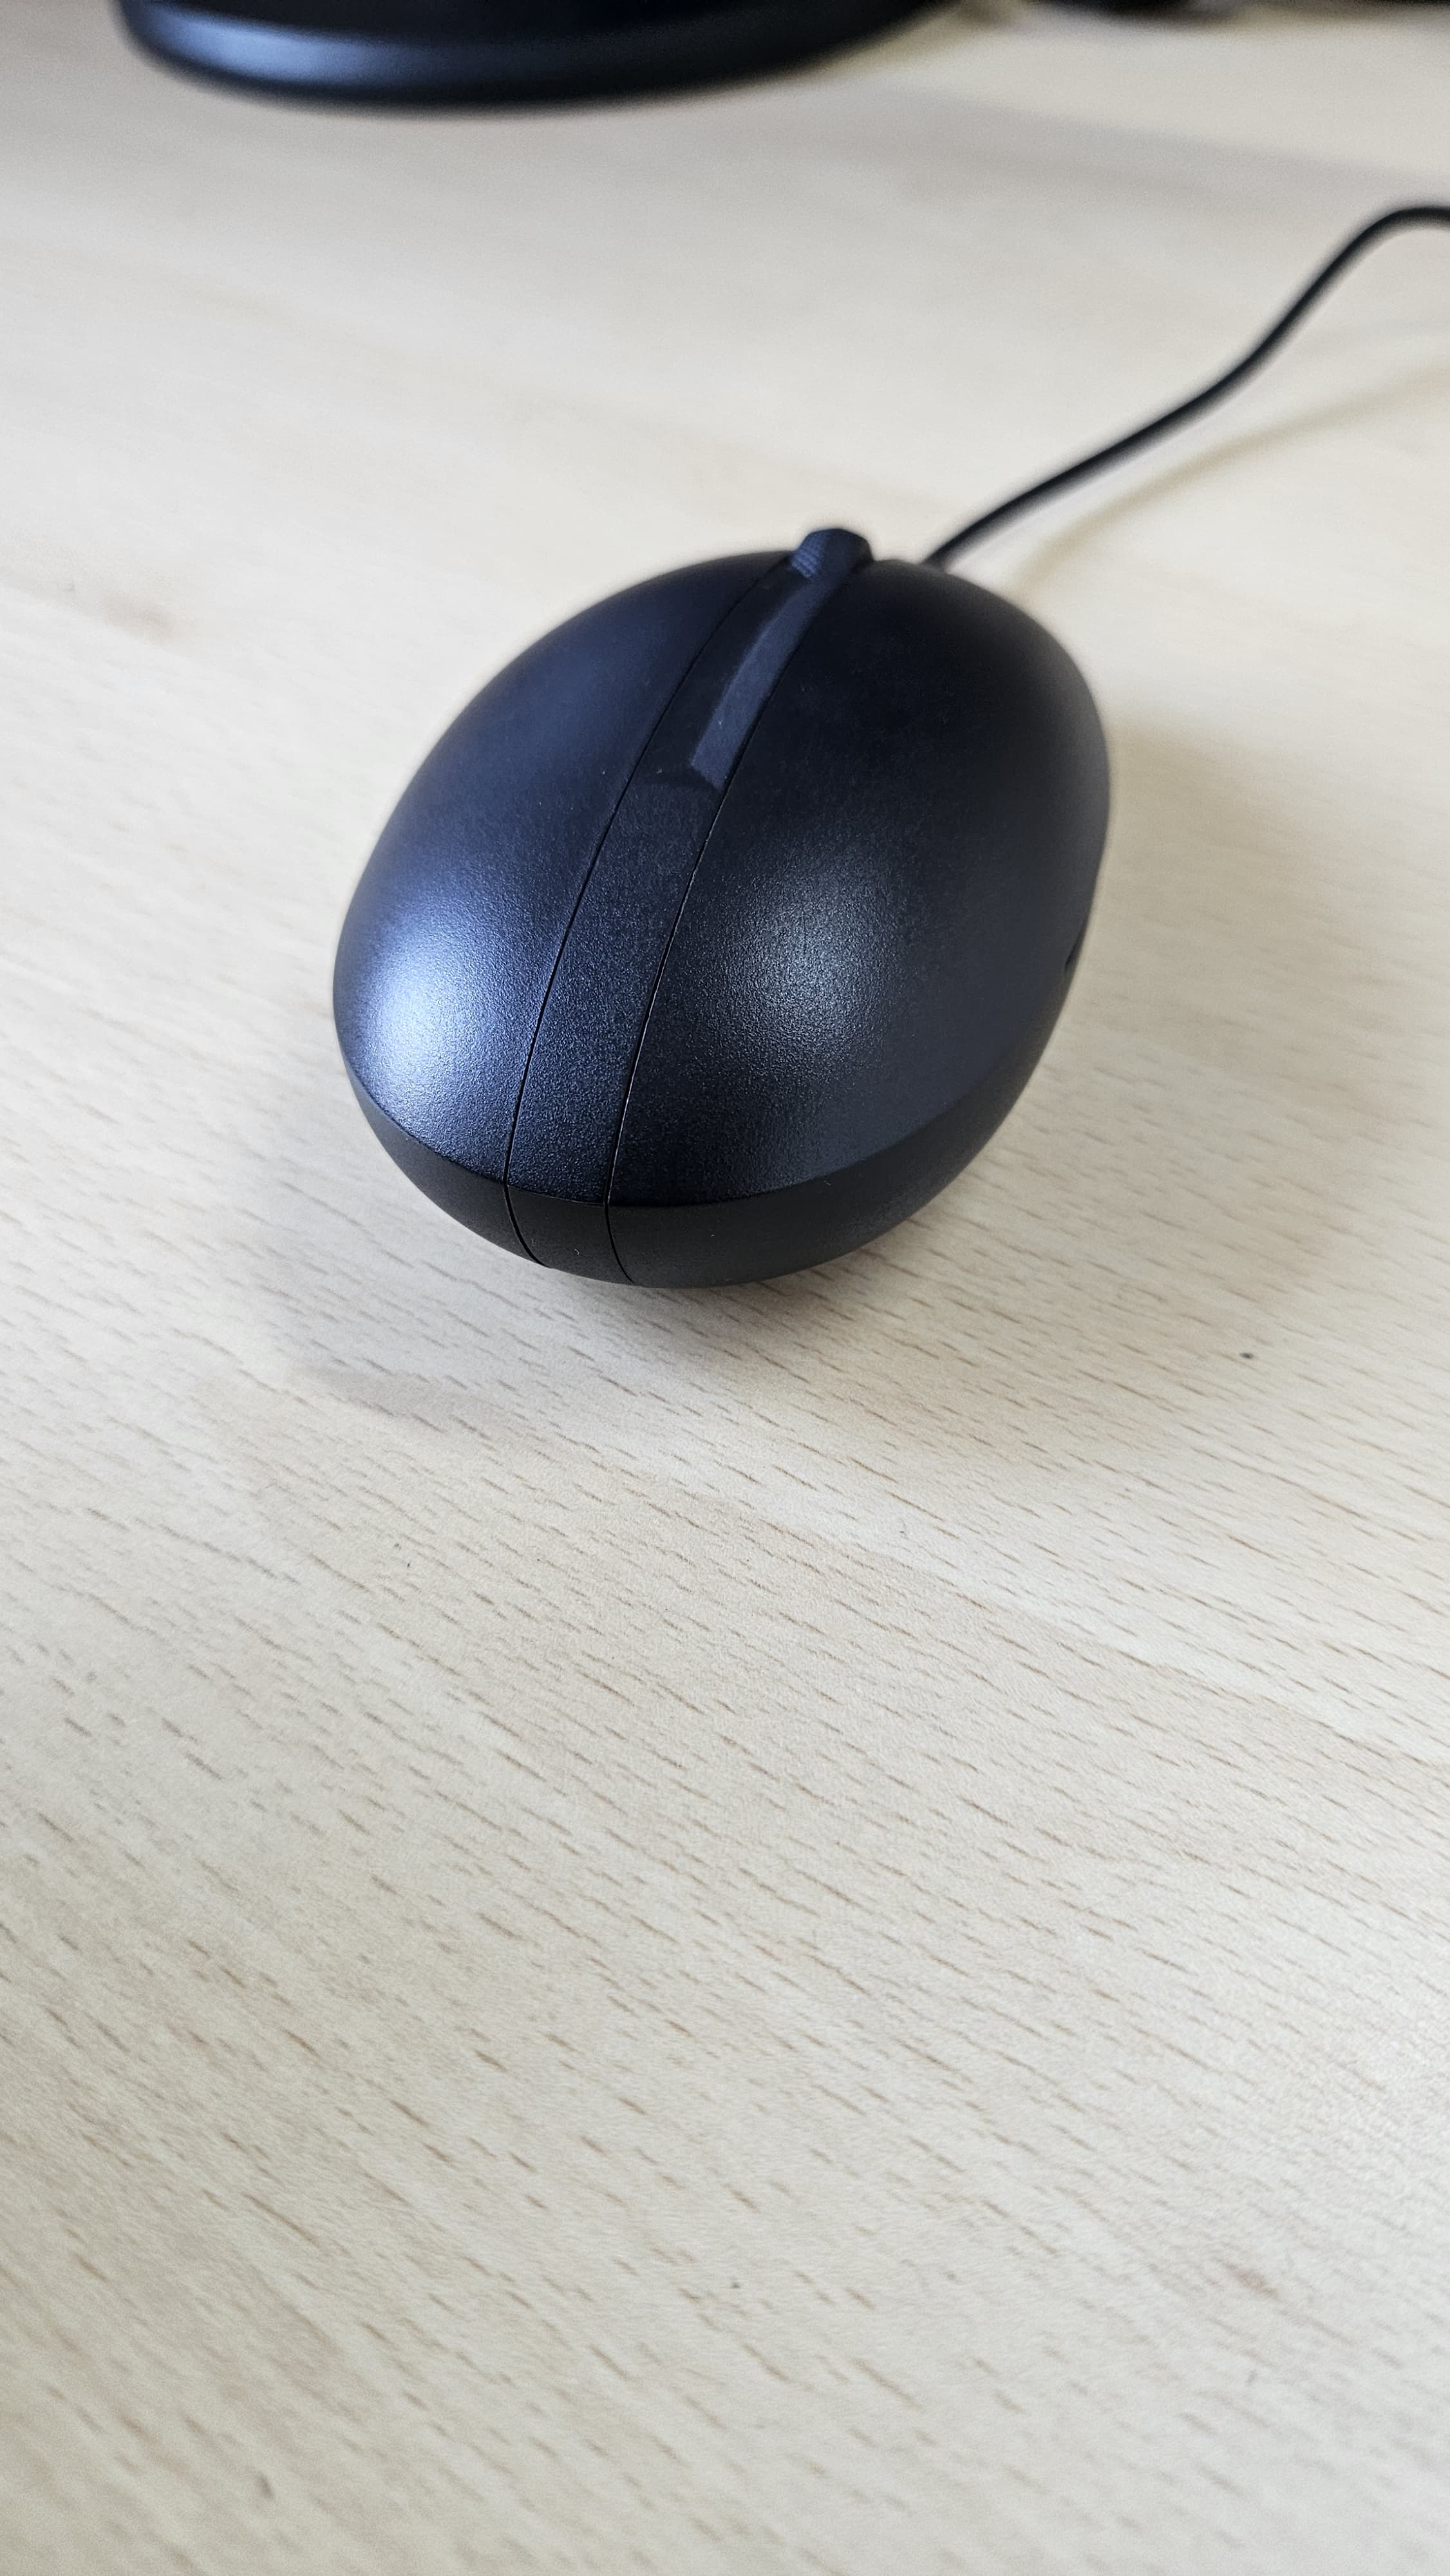

In [11]:
display(Image(filename="/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/test/images/localtest.jpg", width=600))